In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

load_dotenv(dotenv_path='Unit 12/news.env')
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("NEWS_API_KEY")

In [3]:
print(api_key)

a2991ae732444699a17582966fd2dd24


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_articles

{'status': 'ok',
 'totalResults': 7677,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Gian M. Volpicelli',
   'title': 'The Rise and Fall of a Bitcoin Mining Sensation',
   'description': 'Compass Mining grew quickly during crypto’s halcyon days. Now, its customers and their thousands of mining machines are stuck.',
   'url': 'https://www.wired.com/story/compass-mining-bitcoin-russia/',
   'urlToImage': 'https://media.wired.com/photos/62e9c5e1d7368105da057de3/191:100/w_1280,c_limit/BitRiver-Mining-Center-Rise-And-Fall-Of-Bitcoin-Mining-Business-1184520941.jpg',
   'publishedAt': '2022-08-03T11:00:00Z',
   'content': "It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He's like, Every machine inside of … [+3472 chars]"},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Lily Hay Newman, Andy Greenberg',
   'title': 'Bitcoin Fog Case Could

In [6]:
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")

# Show sample article
bitcoin_articles["articles"][0]

Total articles about Bitcoin: 7677


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': 'The Rise and Fall of a Bitcoin Mining Sensation',
 'description': 'Compass Mining grew quickly during crypto’s halcyon days. Now, its customers and their thousands of mining machines are stuck.',
 'url': 'https://www.wired.com/story/compass-mining-bitcoin-russia/',
 'urlToImage': 'https://media.wired.com/photos/62e9c5e1d7368105da057de3/191:100/w_1280,c_limit/BitRiver-Mining-Center-Rise-And-Fall-Of-Bitcoin-Mining-Business-1184520941.jpg',
 'publishedAt': '2022-08-03T11:00:00Z',
 'content': "It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He's like, Every machine inside of … [+3472 chars]"}

In [7]:
# Fetch the Ethereum news articles
ether_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
ether_articles

{'status': 'ok',
 'totalResults': 4866,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Gian M. Volpicelli',
   'title': "Ethereum's 'Merge' Is a Big Deal for Crypto—and the Planet",
   'description': 'One of the most influential cryptocurrency projects is set to finally ditch proof-of-work mining.',
   'url': 'https://www.wired.com/story/ethereum-merge-big-deal-crypto-environment/',
   'urlToImage': 'https://media.wired.com/photos/62fe63bcfd602ff2f11e6fbf/191:100/w_1280,c_limit/Ethereum-Ditches-Crypto-Business-1036181110.jpg',
   'publishedAt': '2022-08-18T16:09:33Z',
   'content': 'Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]'},
  {'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'Instagram is expanding NFT features to more than 100 countries',
   'descr

In [8]:
# Print total articles
print(f"Total articles about Bitcoin: {ether_articles['totalResults']}")

# Show sample article
ether_articles["articles"][0]

Total articles about Bitcoin: 4866


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': "Ethereum's 'Merge' Is a Big Deal for Crypto—and the Planet",
 'description': 'One of the most influential cryptocurrency projects is set to finally ditch proof-of-work mining.',
 'url': 'https://www.wired.com/story/ethereum-merge-big-deal-crypto-environment/',
 'urlToImage': 'https://media.wired.com/photos/62fe63bcfd602ff2f11e6fbf/191:100/w_1280,c_limit/Ethereum-Ditches-Crypto-Business-1036181110.jpg',
 'publishedAt': '2022-08-18T16:09:33Z',
 'content': 'Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]'}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000
2,2022-07-25,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835
3,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
4,2022-07-21,Elon Musk-owned electric vehicle making compan...,0.2023,0.053,0.000,0.947


In [10]:
# Create the Ethereum sentiment scores DataFrame
ether_sentiments = []

for article in ether_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ether_df = pd.DataFrame(ether_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ether_df = ether_df[cols]

ether_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
1,2022-08-04,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901
2,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827
3,2022-07-23,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955
4,2022-07-25,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.047564,0.066060,0.053250,0.88068
std,0.452871,0.070961,0.073677,0.09109
min,-0.908100,0.000000,0.000000,0.62800
25%,-0.296000,0.000000,0.000000,0.82225
50%,0.000000,0.058000,0.000000,0.88500
75%,0.362050,0.105250,0.102250,0.95250
max,0.924600,0.372000,0.307000,1.00000


In [12]:
# Describe the Ethereum Sentiment
ether_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.124739,0.072640,0.044620,0.88276
std,0.448994,0.068879,0.068748,0.08588
min,-0.936600,0.000000,0.000000,0.64600
25%,-0.083700,0.000000,0.000000,0.82000
50%,0.115350,0.061000,0.000000,0.88850
75%,0.498075,0.118250,0.059000,0.94375
max,0.840200,0.249000,0.354000,1.00000


In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

sw = set(stopwords.words('english'))



# Expand the default stopwords list if necessary
sw_addon = {'the'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)

bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-03,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881,"[wa, morning, june, bill, stewart, ceo, maineb..."
1,2022-08-02,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000,"[tools, trace, cryptocurrencies, last, several..."
2,2022-07-25,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835,"[got, ta, hand, people, impetuous, even, face,..."
3,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
4,2022-07-21,Elon Musk-owned electric vehicle making compan...,0.2023,0.053,0.000,0.947,"[elon, muskowned, electric, vehicle, making, c..."


In [17]:
# Create a new tokens column for Ethereum
ether_df['tokens'] = ether_df['text'].apply(tokenizer)

ether_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
1,2022-08-04,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901,"[nonfungible, token, nft, market, ha, fallen, ..."
2,2022-08-02,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827,"[day, week, ending, letter, inevitably, mean, ..."
3,2022-07-23,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955,"[less, two, week, soft, launch, gamestops, nft..."
4,2022-07-25,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952,"[ethereum, merge, significant, people, crypto,..."


In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2

big_string_1 = bitcoin_df['text'].str.cat()
processed_1 = tokenizer(big_string_1)
bigrams_1 = Counter(ngrams(processed_1, n=2))

In [20]:
# Generate the Ethereum N-grams where N=2
big_string_2 = ether_df['text'].str.cat()
processed_2 = tokenizer(big_string_2)
bigrams_2 = Counter(ngrams(processed_2, n=2))

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(bigrams_1, 10)

top_10_btc

[(('aug', 'reuters'), 10),
 (('hard', 'drive'), 6),
 (('charsjuly', 'reuters'), 6),
 (('charsaug', 'reuters'), 6),
 (('july', 'reuters'), 6),
 (('charsus', 'stock'), 6),
 (('bitcoin', 'holding'), 5),
 (('bitcoin', 'mining'), 4),
 (('world', 'biggest'), 4),
 (('second', 'quarter'), 4)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(bigrams_2, 10)

top_10_eth

[(('aug', 'reuters'), 5),
 (('crypto', 'market'), 5),
 (('ethereum', 'blockchain'), 4),
 (('cryptocurrency', 'market'), 4),
 (('consensus', 'mechanism'), 4),
 (('retail', 'investor'), 4),
 (('federal', 'reserve'), 4),
 (('nonfungible', 'token'), 3),
 (('securities', 'exchange'), 3),
 (('exchange', 'commission'), 3)]

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fizza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


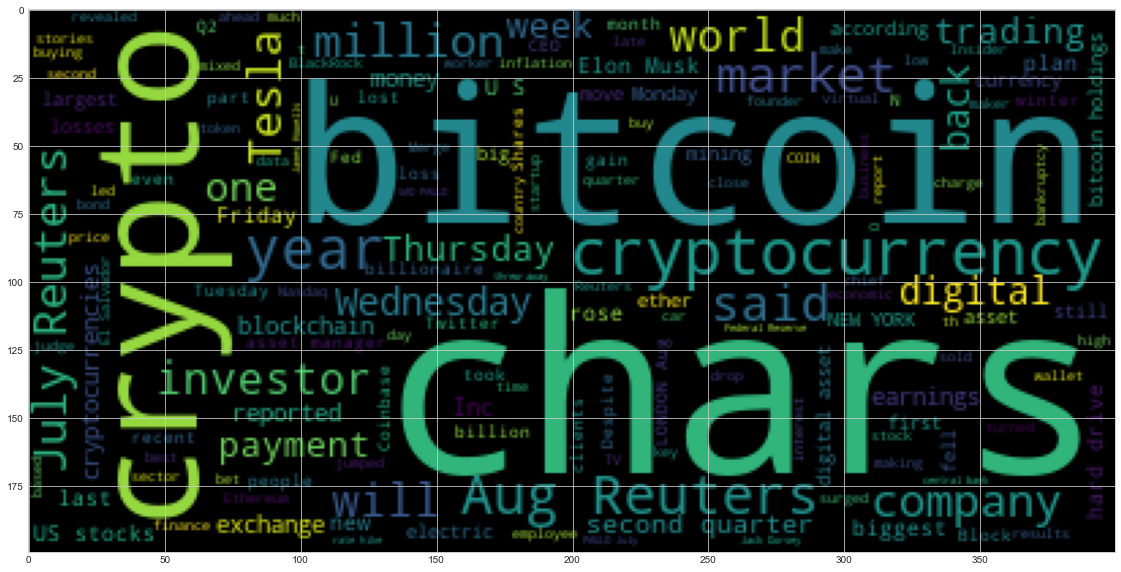

In [25]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string_1)
plt.imshow(wc_btc)

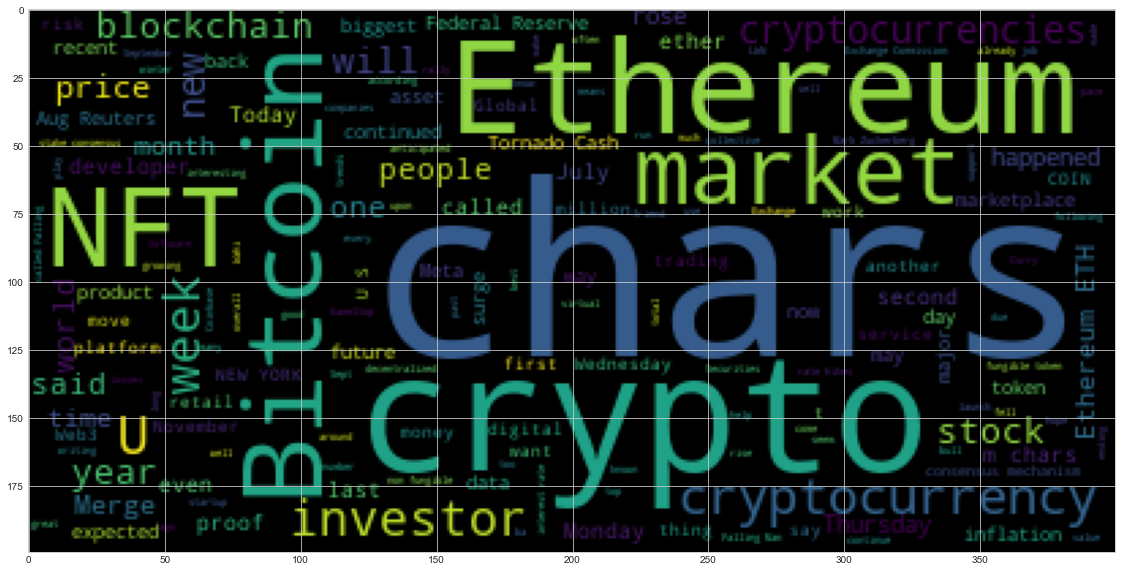

In [26]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string_2)
plt.imshow(wc_eth)

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

print("finished download of package")

finished download of package


In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [32]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string_1)

In [34]:
# Run the NER processor on all of the text
doc_1 = nlp(bitcoin_text)

# Add a title to the document
doc_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [36]:
# Render the visualization
displacy.render(doc_1, style='ent')

In [38]:
# List all Entities
for ent in doc_1.ents:
    print(ent.text)

8:45 in the morning of June 13
Bill Stewart
Maine
Dynamics Mining
the last several years
millions
UK
mans
Every year
Belgium
the University of Cambridges Bitcoin Electricity Consump
Musk
Tesla
Bitcoin
Q2
chars]July 27
Reuters
6.85%
22,717.05
22:05
GMT
Wednesday
1,457.27
29.1%
the weeks
Krist
2021
Tesla
$936 million
the second quarter of 2022
Bitcoin
75
24,000
first
August
US
this week
as much as 4%
24,191
Aug 19
Reuters
Friday
three-week
2
Reuters
a good month
months
more than 17%
July
October
chars]July 30
Reuters
3.36%
24,584.24
GMT
Saturday
798.93
39.7%
the year
2022
Wednesday
$2.3 billion
second-quarter
a record $3.3 billion
first
11
Reuters
the United States
chars]NEW YORK
July 20
Reuters
Wednesday
Tesla Inc
TSLA.O
about 75%
fiat
ten
Wednesday
approximately 75%
chars]July 29
Reuters
Bitcoin Valley
Honduran
Santa Lucia
one
Today
+8199 chars]El Salvador
Tuesday
$1.6 billion
Central America
la
Michael Saylor
quarterly
more than $900 million
the last month
Ethereum 2.0
second
21 milli

In [40]:
# Concatenate all of the Ethereum text together
ethereum_text = (big_string_2)

In [42]:
# Run the NER processor on all of the text
doc_2 = nlp(ethereum_text)

# Add a title to the document
doc_2.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [43]:
# Render the visualization
displacy.render(doc_2, style='ent')